In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
classes = {
    "no_tumor": 0,
    "pituitary_tumor": 1,
    "glioma_tumor": 2,
    "meningioma_tumor": 3,
}

X = []

Y = []

for cls, label in classes.items():

    pth = f"Images_Cropped\\cropped_training\\{cls}"

    for filename in os.listdir(pth):

        img = cv2.imread(os.path.join(pth, filename), 0)

        img = cv2.resize(img, (224, 224))

        X.append(img.flatten() / 255.0)

        Y.append(label)

X = np.array(X)

Y = np.array(Y)

In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10, test_size=0.2)

pca = PCA(n_components=0.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

sv = SVC()
sv.fit(pca_train, ytrain)

train_score = sv.score(pca_train, ytrain)
test_score = sv.score(pca_test, ytest)
print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.8798675842843453
Testing Score: 0.6547038327526132


In [4]:
# Display sample images and predictions
def display_samples(folder, title, num_samples=9):
    plt.figure(figsize=(12, 8))
    c = 1
    for i, filename in enumerate(os.listdir(folder)[:num_samples]):
        img = cv2.imread(os.path.join(folder, filename), 0)
        img = cv2.resize(img, (224, 224)).flatten() / 255.0
        prediction = sv.predict(pca.transform([img]))

        plt.subplot(3, 3, c)
        plt.title(dec[prediction[0]])
        plt.imshow(img.reshape(224, 224), cmap="gray")
        plt.axis("off")
        c += 1
    plt.suptitle(title)
    plt.show()

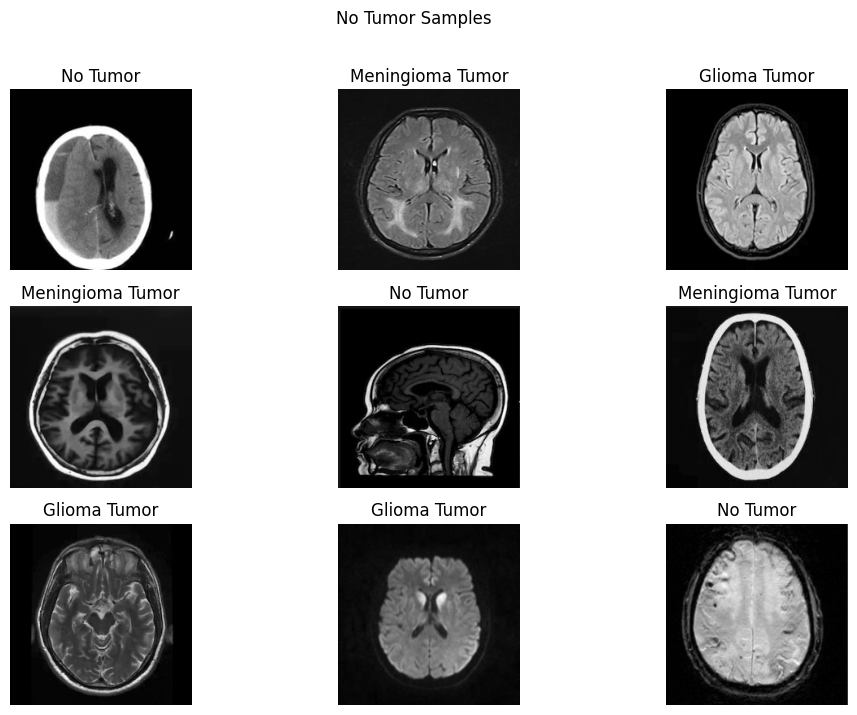

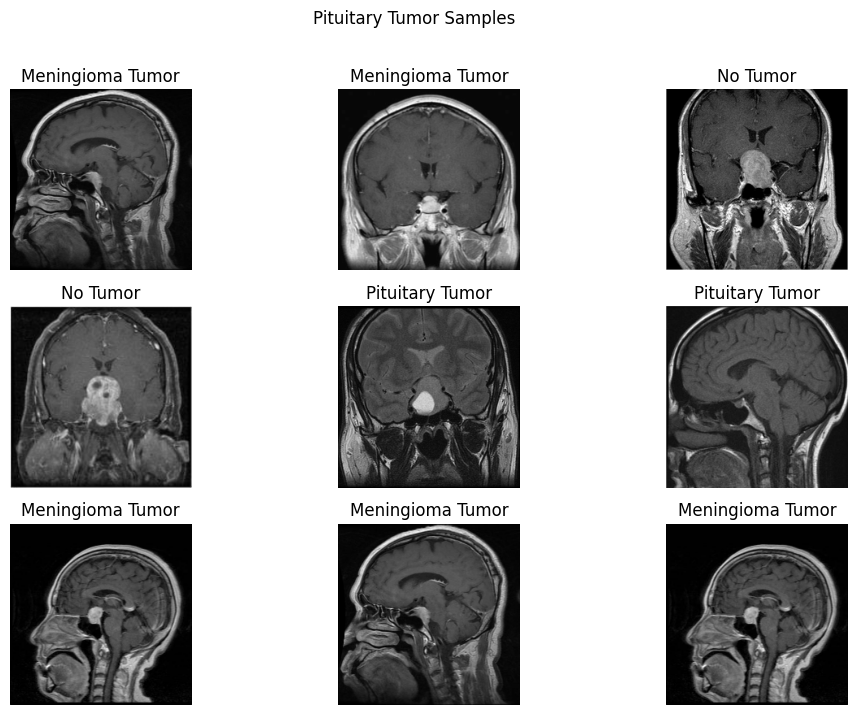

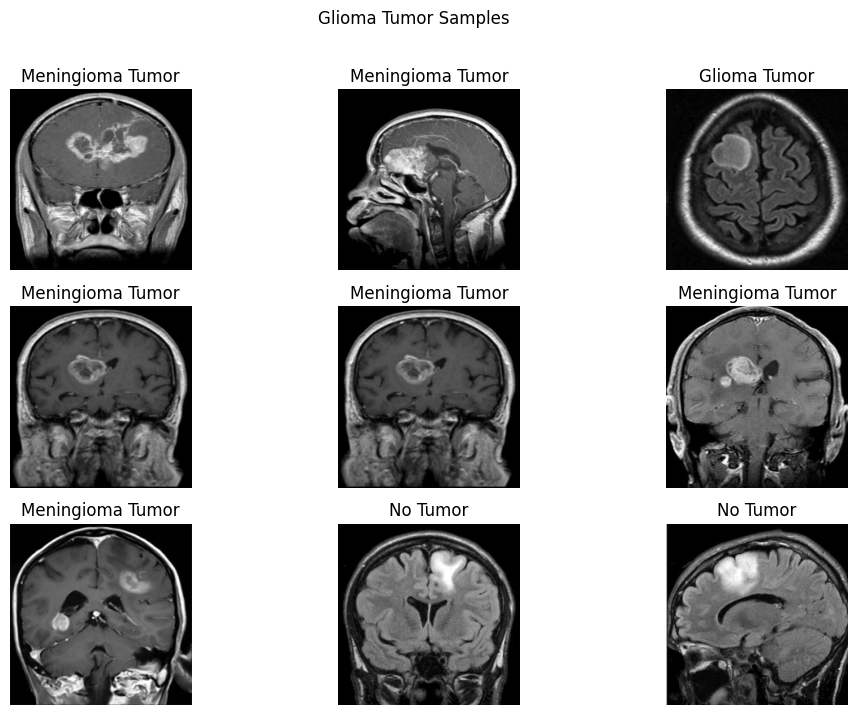

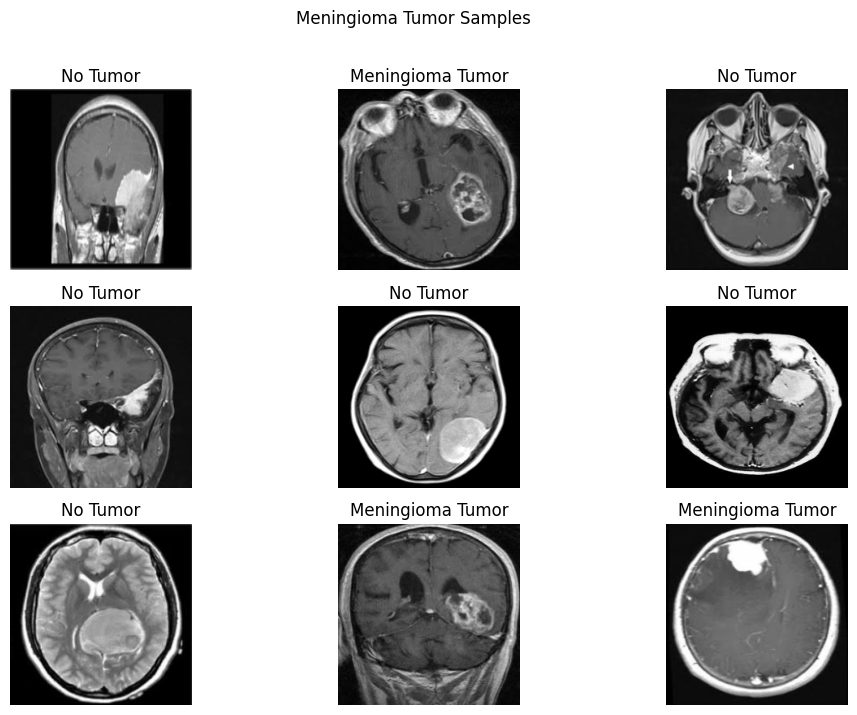

In [5]:
dec = {0: "No Tumor", 1: "Pituitary Tumor", 2: "Glioma Tumor", 3: "Meningioma Tumor"}
tumor_folders = ["no_tumor", "pituitary_tumor", "glioma_tumor", "meningioma_tumor"]
for tumor_folder in tumor_folders:
    folder_path = f"Brain Tumor\\Testing\\{tumor_folder}\\"
    title = f'{tumor_folder.replace("_", " ").title()} Samples'
    display_samples(folder_path, title)

In [6]:
tumor_counts = {dec[label]: np.sum(Y == label) for label in classes.values()}
table_data = {
    "Index": range(1, len(classes) + 1),
    "Tumor Type": list(tumor_counts.keys()),
    "Count": list(tumor_counts.values()),
}
tumor_table = pd.DataFrame(table_data)
styled_table = tumor_table.style.set_properties(
    **{"border": "3px solid black", "text-align": "center"}
)
print("\033[1mTumor Type Counts:\033[0m")
display(styled_table)

Tumor Type Counts:


,Index,Tumor Type,Count
0,1,No Tumor,1974
1,2,Pituitary Tumor,4135
2,3,Glioma Tumor,4130
3,4,Meningioma Tumor,4110


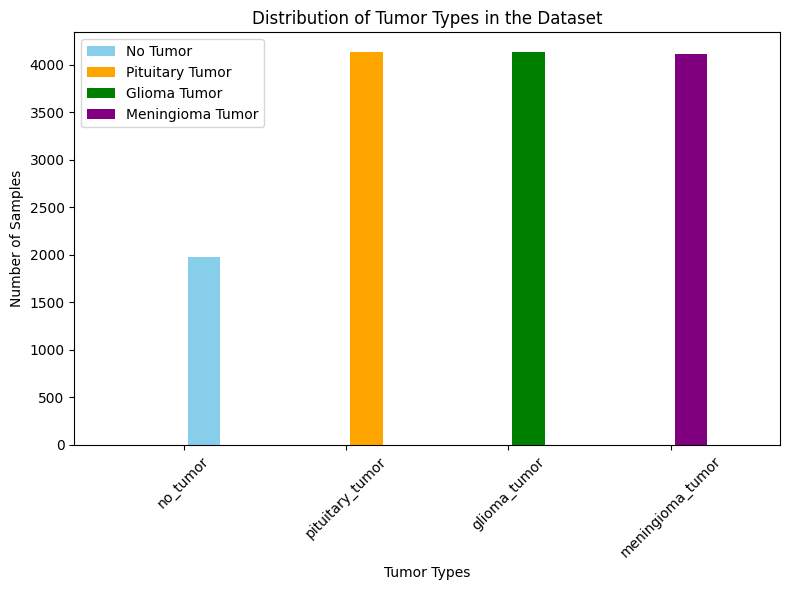

In [7]:
tumor_labels = [dec[label] for label in Y]
colors = ["skyblue", "orange", "green", "purple"]
plt.figure(figsize=(8, 6))
for label, color in zip(classes.values(), colors):
    plt.hist(
        np.array(tumor_labels)[Y == label],
        bins=len(classes),
        align="mid",
        rwidth=0.8,
        color=color,
        label=dec[label],
    )
plt.xlabel("Tumor Types")
plt.ylabel("Number of Samples")
plt.title("Distribution of Tumor Types in the Dataset")
plt.xticks(range(len(classes)), list(classes.keys()), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()